# Fetal Health Classification Data Analysis

- Read in data
- Data Cleaning
- EDA



## Read In Data

In [122]:
# Import Packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Sklearn Packages
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error, precision_score, confusion_matrix, accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn import set_config
set_config(print_changed_only=False)
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

pd.set_option('display.max_columns', 300)
% matplotlib inline

plt.style.use('seaborn')

In [2]:
import os
os.path.isfile('fetal_health.csv')

True

In [3]:
!ls -l

total 1784
-rw-r--r--  1 ismael  staff  119616 Nov  9 21:41 Mod_3_Project.ipynb
-rw-r--r--@ 1 ismael  staff    4004 Nov  9 16:08 README.md
drwxr-xr-x@ 3 ismael  staff      96 Nov  9 16:08 data.csv
-rw-r--r--@ 1 ismael  staff  228715 Nov  9 16:08 fetal_health.csv
-rw-r--r--@ 1 ismael  staff  556629 Nov 10 15:06 fetal_heatlh_data_analysis.ipynb


In [4]:
#Read in UCI Heart Disiease Databasae
df = pd.read_csv('fetal_health.csv')


In [5]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


## Data Cleaning

In [6]:
#Check for null Values
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [7]:
#Check Shape of dataframe
df.shape

(2126, 22)

In [8]:
#Data types
df.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [9]:
df.fetal_health = np.where(df.fetal_health > 1.0, 2.0, df.fetal_health)

In [10]:
df.fetal_health.value_counts()

1.0    1655
2.0     471
Name: fetal_health, dtype: int64

## EDA

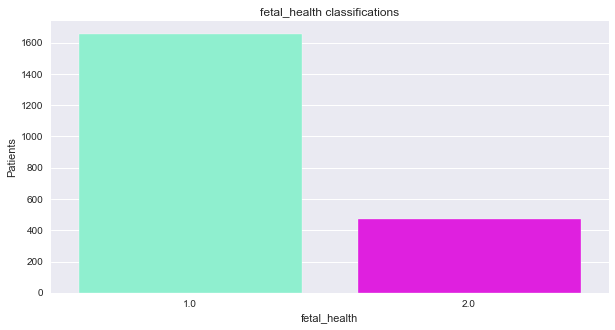

In [11]:
# Check the Distribution of target data
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(df['fetal_health'], alpha = 1, palette= ['aquamarine','magenta','mediumblue'])
plt.title('fetal_health classifications')
plt.ylabel('Patients')

plt.show()

## Train Test Split

In [12]:
# Train Test Split
X = df.drop('fetal_health', axis=1)
y = df.fetal_health

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size= .5, random_state=1)

In [13]:
# Checking if train test split ran correclty
# for dataset in [y_train, y_val, y_test]:
#     print(round(len(dataset)/len(y), 2))

## Baseline Models

In [14]:
# Evaluation function
def evaluation(y_test, y_pred):
    print('Accuracy: ' + str(metrics.accuracy_score(y_test, y_pred)))
    print('Recall: ' + str(metrics.recall_score(y_test, y_pred)))
    print('F1 Score: ' + str(metrics.f1_score(y_test, y_pred)))
    print('Precision: ' + str(metrics.precision_score(y_test, y_pred)))
    print('\nConfusion Matrix:')
    print(confusion_matrix(y_test, y_pred))

### Logistic Regression

In [15]:
# Baseline Logistic Regression Model

lr_baseline = LogisticRegression()
lr_baseline.fit(X_train, y_train)
y_pred_lr_baseline = lr_baseline.predict(X_test)

# Evaluation Metrics
evaluation(y_test, y_pred_lr_baseline)

Accuracy: 0.8834586466165414
Recall: 0.9535452322738386
F1 Score: 0.9263657957244655
Precision: 0.9006928406466512

Confusion Matrix:
[[390  19]
 [ 43  80]]


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [16]:
coef_table = pd.DataFrame(list(X_train.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",lr_baseline.coef_.transpose())
coef_table

,0,Coefs
0,baseline value,0.059714
1,accelerations,-0.003133
2,fetal_movement,0.020994
3,uterine_contractions,-0.004259
4,light_decelerations,-0.001805
5,severe_decelerations,-0.000003
6,prolongued_decelerations,0.000653
7,abnormal_short_term_variability,0.060535
8,mean_value_of_short_term_variability,-0.550579
9,percentage_of_time_with_abnormal_long_term_var...,0.059062


### KNN

In [17]:
# Baseline KNN Model

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

# Evaluation metrics
evaluation(y_test, y_pred_knn)

Accuracy: 0.9210526315789473
Recall: 0.9682151589242054
F1 Score: 0.9496402877697842
Precision: 0.9317647058823529

Confusion Matrix:
[[396  13]
 [ 29  94]]


### Decision Tree

In [18]:
# Baseline Decision Tree Model
tree = DecisionTreeClassifier()
tree = tree.fit(X_train,y_train)
y_pred_tree = tree.predict(X_test)

# Evaluation metrics
evaluation(y_test, y_pred_tree)

Accuracy: 0.9229323308270677
Recall: 0.9437652811735942
F1 Score: 0.949569495694957
Precision: 0.9554455445544554

Confusion Matrix:
[[386  23]
 [ 18 105]]


### Random Forest

In [19]:
# Baseline Random Forest Model
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred_rfr = rfc.predict(X_test)

# Evaluation metrics
evaluation(y_test, y_pred_rfr)

Accuracy: 0.9454887218045113
Recall: 0.9926650366748166
F1 Score: 0.9655172413793103
Precision: 0.9398148148148148

Confusion Matrix:
[[406   3]
 [ 26  97]]


### Baseline Models Evaluation

### 2. EDA

In [20]:
# value counts for having heart disease or not
df['fetal_health'].value_counts()

1.0    1655
2.0     471
Name: fetal_health, dtype: int64

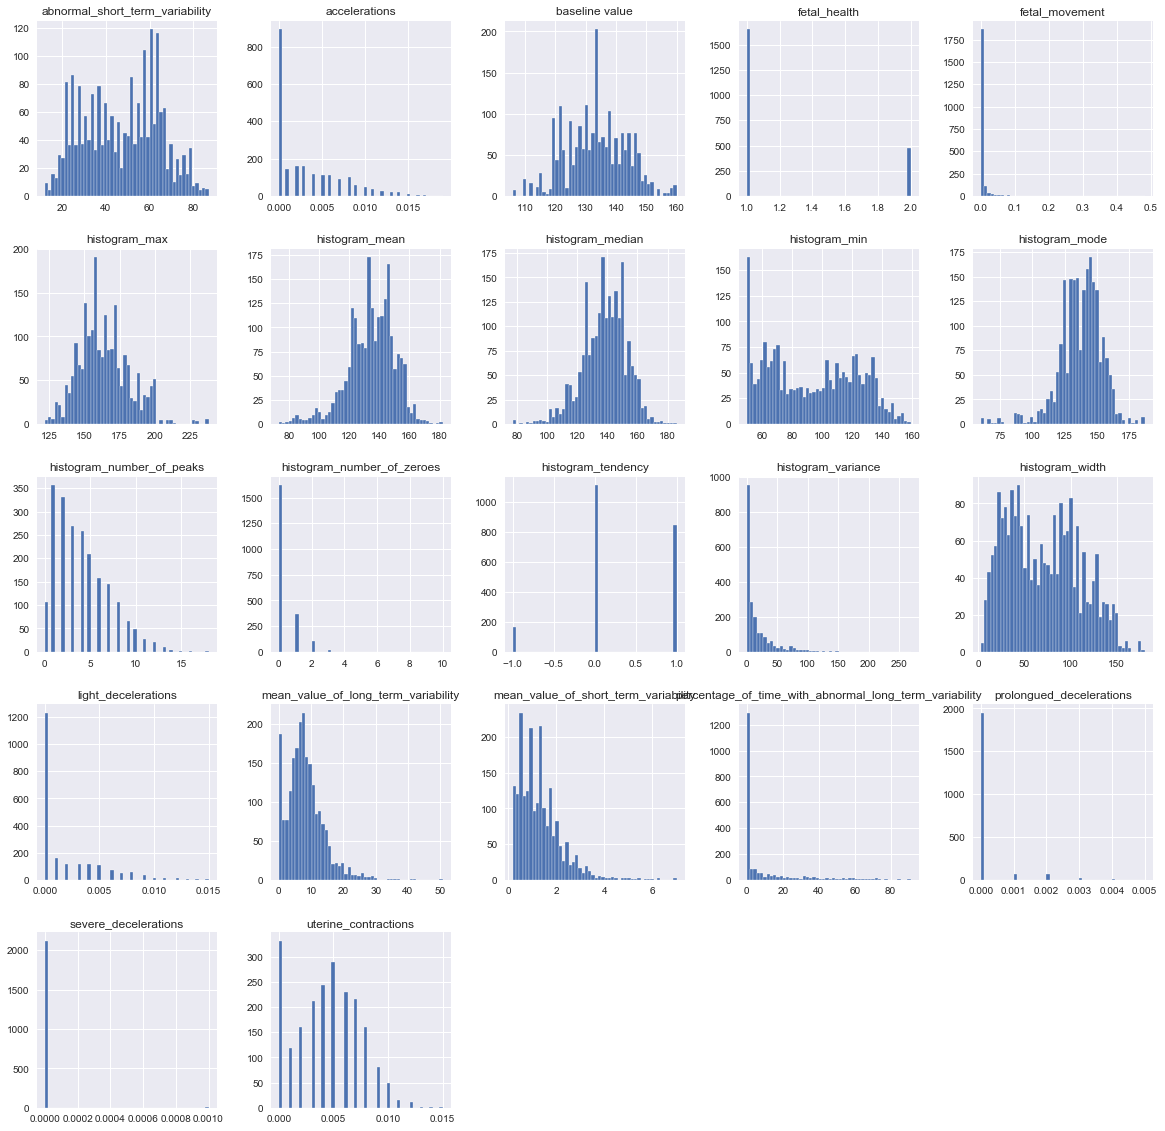

In [21]:
# Histogram of all featrues
df.hist(bins=50, figsize=(20,20))
plt.show()

In [22]:
#check value counts of acceleration feature
df.accelerations.value_counts()

0.000    894
0.003    161
0.002    160
0.001    143
0.004    117
0.006    112
0.005    110
0.008    103
0.007     91
0.009     60
0.010     50
0.011     36
0.012     24
0.013     22
0.014     20
0.015      9
0.016      7
0.017      4
0.018      2
0.019      1
Name: accelerations, dtype: int64

In [23]:
# bin accelerations by quantile
df['quantile_acceleration'] = pd.qcut(df['accelerations'],
                                     q=[0,0.25,.75,1], labels = False,
                                     duplicates='drop')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health,quantile_acceleration
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0,0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0,0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0,0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0,0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0,1


Here we created a new feature quantile_accelerations which binned acceleration into catagories of percent value increase.  The quantiles where set at 0,.25,.75, and 1.

In [24]:
#check value counts of uterine_contractions
df.uterine_contractions.value_counts()

0.000    332
0.005    290
0.004    244
0.006    231
0.007    216
0.003    212
0.008    160
0.002    160
0.001    118
0.009     82
0.010     49
0.011     16
0.012     11
0.013      2
0.014      2
0.015      1
Name: uterine_contractions, dtype: int64

In [25]:
#create new column of contractions per minute
df['uterine_cont_per_min'] = df['uterine_contractions']*60

In [26]:
df.uterine_cont_per_min.value_counts()

0.00    332
0.30    290
0.24    244
0.36    231
0.42    216
0.18    212
0.12    160
0.48    160
0.06    118
0.54     82
0.60     49
0.66     16
0.72     11
0.84      2
0.78      2
0.90      1
Name: uterine_cont_per_min, dtype: int64

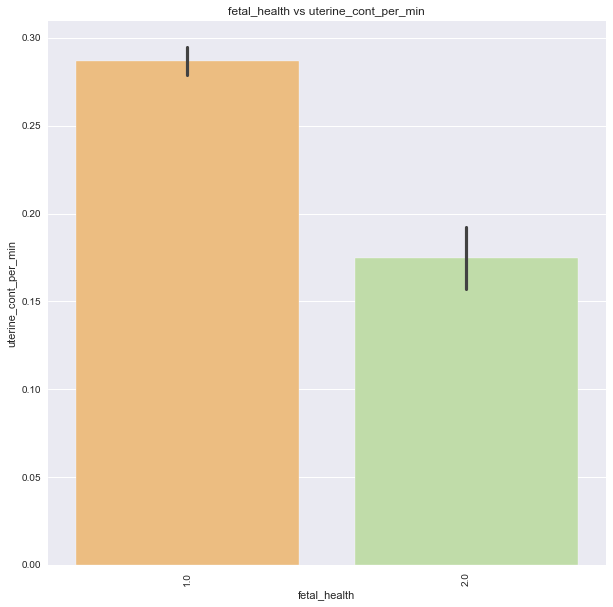

In [27]:
#bar plot looking at the class
plt.figure(figsize = (10,10))
sns.barplot(x = 'fetal_health', 
            y ='uterine_cont_per_min',
            data = df, 
            palette = 'Spectral').set_title('fetal_health vs uterine_cont_per_min')
plt.xticks(rotation='vertical')
plt.show()

In [28]:
df.abnormal_short_term_variability.value_counts()

60.0    62
58.0    61
65.0    60
64.0    58
63.0    58
        ..
83.0     4
14.0     4
12.0     2
82.0     2
87.0     1
Name: abnormal_short_term_variability, Length: 75, dtype: int64

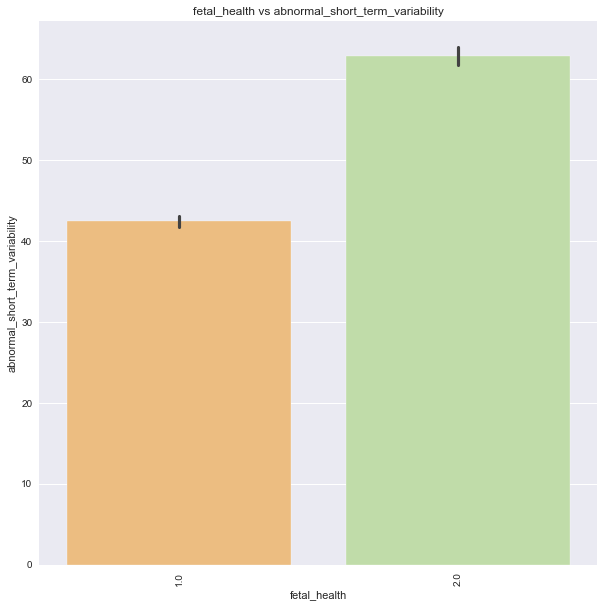

In [29]:
plt.figure(figsize = (10,10))
sns.barplot(x = 'fetal_health', 
            y ='abnormal_short_term_variability',
            data = df, 
            palette = 'Spectral').set_title('fetal_health vs abnormal_short_term_variability')
plt.xticks(rotation='vertical')
plt.show()

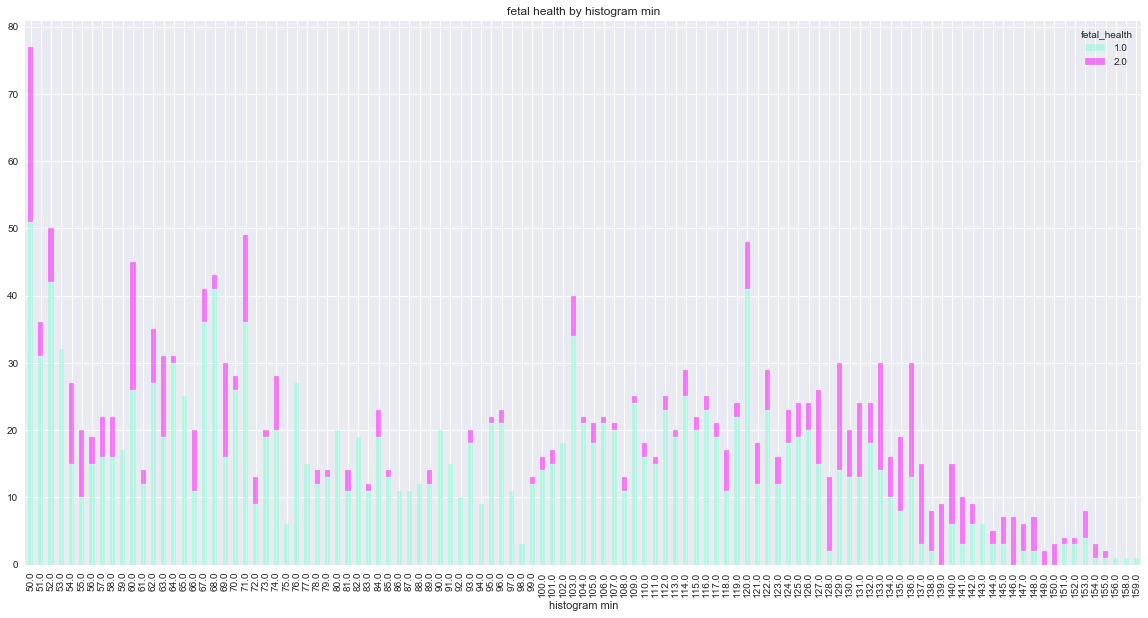

In [30]:
#Histogram showing the histogram distrubition values of minimum FHR by the three Classes
histogram_min = df.groupby(['histogram_min','fetal_health']).histogram_min.count().unstack()
pl = histogram_min.plot(kind = 'bar', stacked =True,
                       title = 'fetal health by histogram min',
                       color = ['aquamarine','magenta','mediumblue'],
                       alpha = .5, figsize = (20,10))
pl.set_xlabel('histogram min')

plt.show()

In [31]:
df.severe_decelerations.value_counts()

0.000    2119
0.001       7
Name: severe_decelerations, dtype: int64

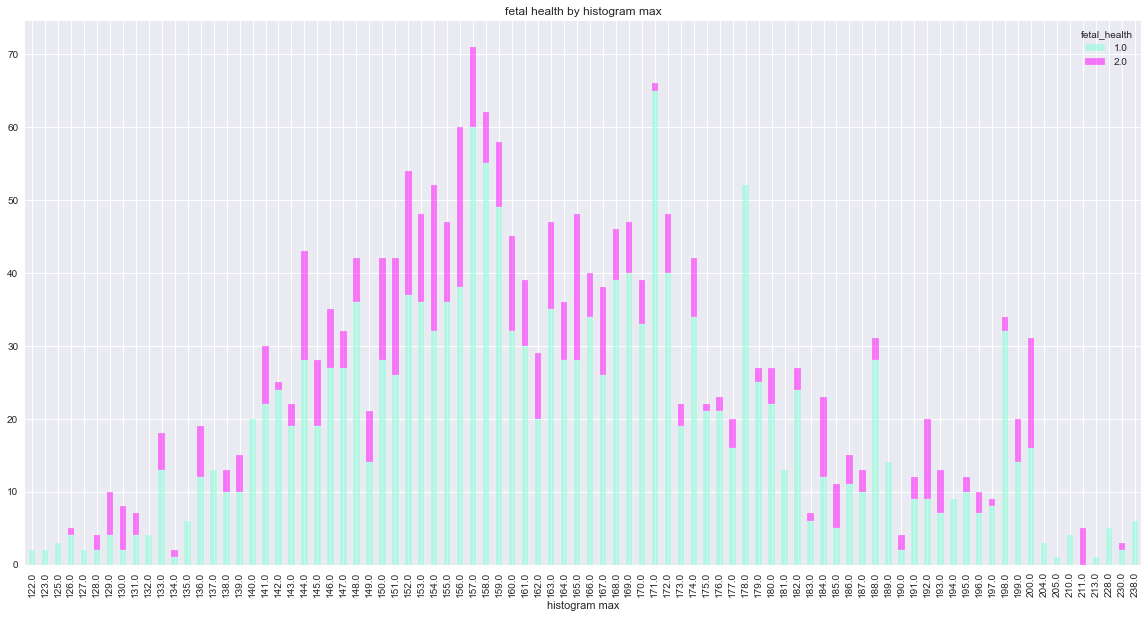

In [32]:
# #Histogram showing the histogram distribution values of maximum FHR by the three Classes
histogram_min = df.groupby(['histogram_max','fetal_health']).histogram_max.count().unstack()
pl = histogram_min.plot(kind = 'bar', stacked =True,
                       title = 'fetal health by histogram max',
                       color = ['aquamarine','magenta','mediumblue'],
                       alpha = .5, figsize = (20,10))
pl.set_xlabel('histogram max')

plt.show()

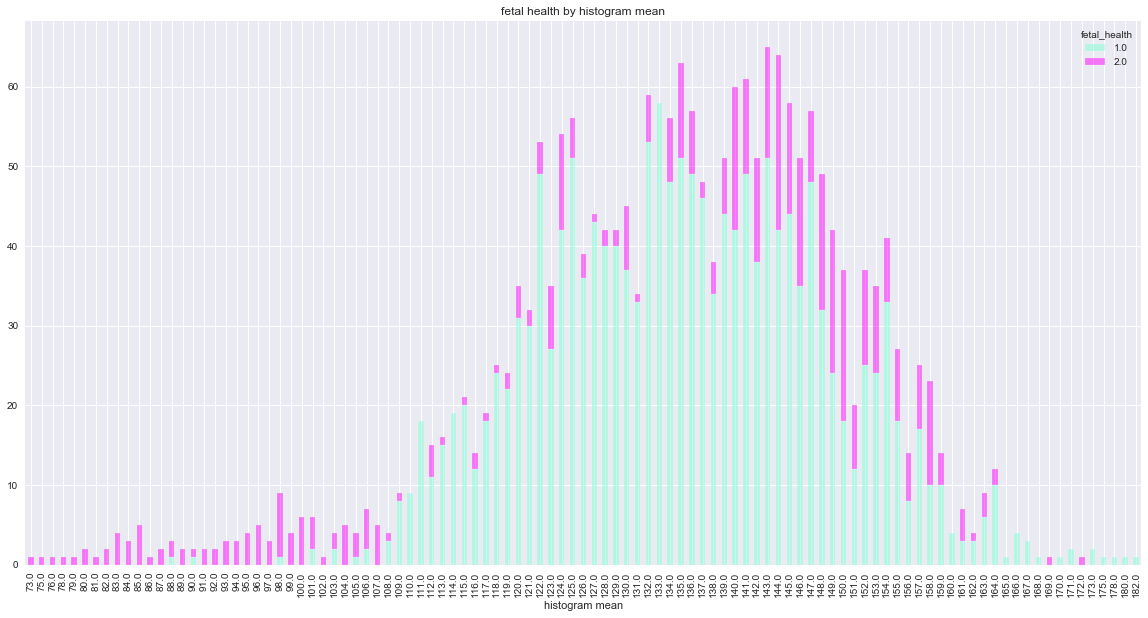

In [33]:
# #Histogram showing the histogram distribution values of average FHR by the three Classes
histogram_min = df.groupby(['histogram_mean','fetal_health']).histogram_mean.count().unstack()
pl = histogram_min.plot(kind = 'bar', stacked =True,
                       title = 'fetal health by histogram mean',
                       color = ['aquamarine','magenta','mediumblue'],
                       alpha = .5, figsize = (20,10))
pl.set_xlabel('histogram mean')

plt.show()

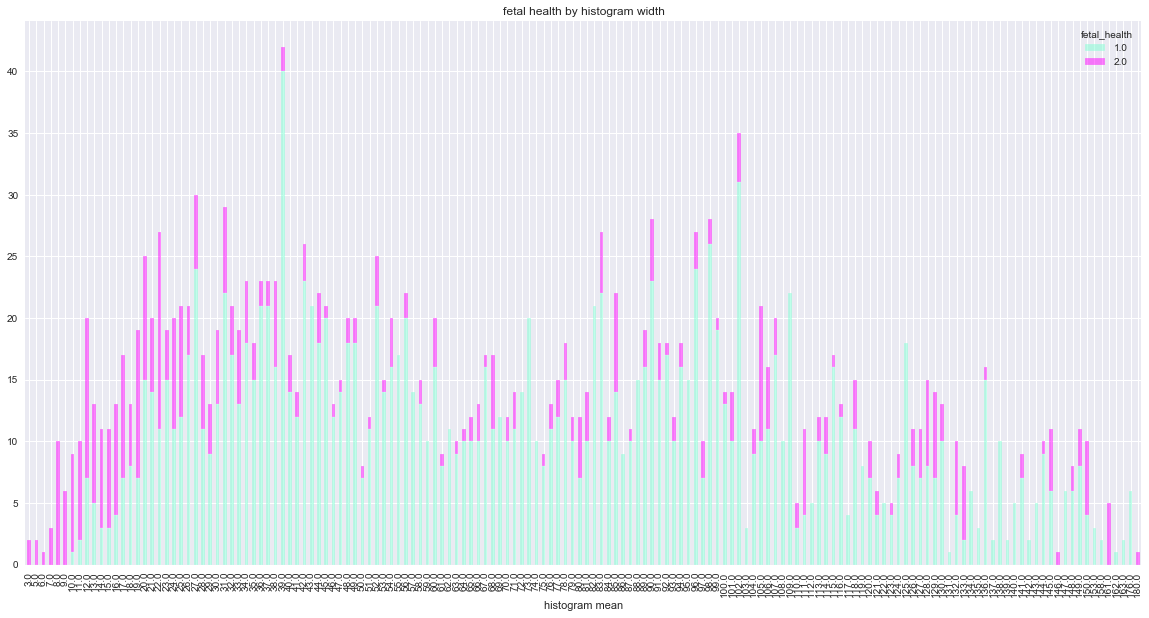

In [34]:
#
histogram_min = df.groupby(['histogram_width','fetal_health']).histogram_width.count().unstack()
pl = histogram_min.plot(kind = 'bar', stacked =True,
                       title = 'fetal health by histogram width',
                       color = ['aquamarine','magenta','mediumblue'],
                       alpha = .5, figsize = (20,10))
pl.set_xlabel('histogram mean')

plt.show()

In [35]:
df.head(1)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health,quantile_acceleration,uterine_cont_per_min
0,120.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0,0,0.0


In [138]:
df.fetal_health.value_counts()

1.0    1655
2.0     471
Name: fetal_health, dtype: int64

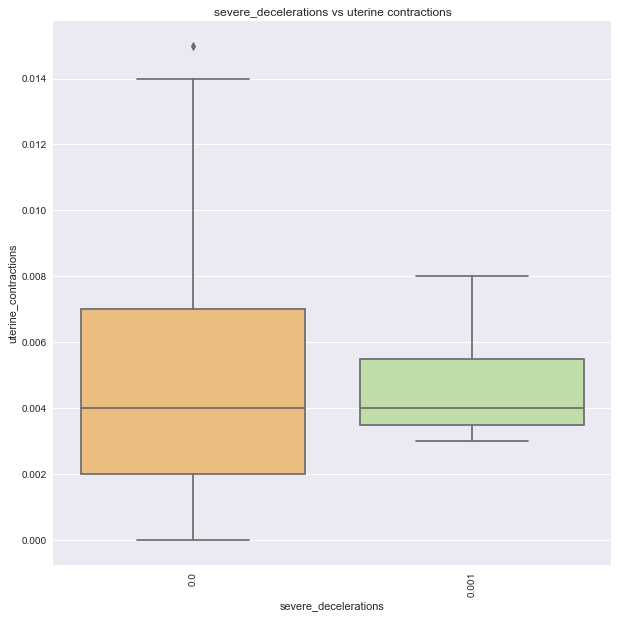

In [36]:
# Boxplot of uter
plt.figure(figsize = (10,10))
sns.boxplot(x = 'severe_decelerations', 
            y ='uterine_contractions',
            data = df, 
            palette = 'Spectral').set_title('severe_decelerations vs uterine contractions')
plt.xticks(rotation='vertical')
plt.show()

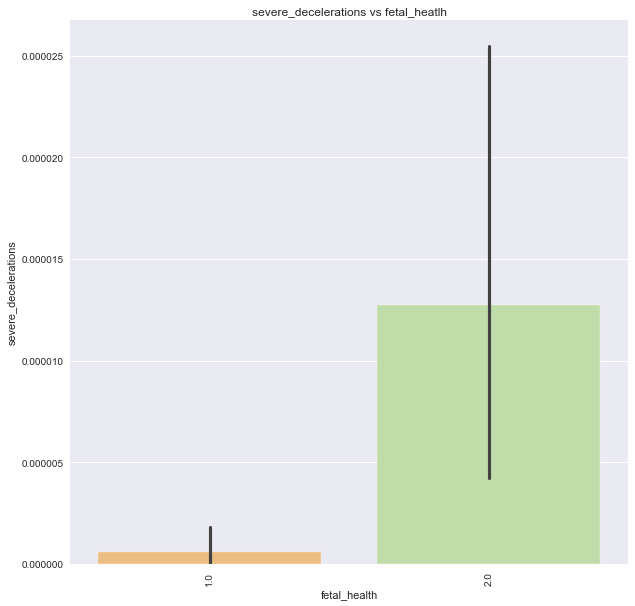

In [37]:
#boxplot of fetal health vs sever deceleration
plt.figure(figsize = (10,10))
sns.barplot(x = 'fetal_health', 
            y ='severe_decelerations',
            data = df, 
            palette = 'Spectral').set_title('severe_decelerations vs fetal_heatlh')
plt.xticks(rotation='vertical')
plt.show()

- create 

In [38]:
fetal_health_pred = df.drop('fetal_health', axis =1)

In [39]:
#pd.plotting.scatter_matrix(fetal_health_pred,figsize= (50,50));
#plt.show()

In [40]:
df.corr()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health,quantile_acceleration,uterine_cont_per_min
baseline value,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,-0.032091,-0.147679,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,0.251875,-0.038281,-0.146373
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,-0.142363,0.298631,-0.154286,0.394147,0.190452,-0.006147,0.243610,0.270334,0.272849,0.125704,0.028420,-0.394760,0.836249,0.089674
fetal_movement,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,0.011047,0.162790,-0.153917,0.099853,0.164654,-0.017749,-0.061192,-0.089671,-0.072329,0.179340,-0.001541,0.060974,0.023206,-0.068779
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,-0.066058,0.142541,-0.113323,0.122766,0.082693,0.057894,-0.104854,-0.187505,-0.140287,0.238582,-0.072314,-0.263639,0.068365,1.000000
light_decelerations,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,-0.242932,0.520467,-0.553534,0.218043,0.397620,0.235296,-0.347233,-0.527354,-0.388586,0.564289,0.000072,-0.032889,-0.082601,0.285079
severe_decelerations,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,-0.037667,0.044880,-0.071974,-0.021135,0.007024,0.043441,-0.215161,-0.158673,-0.160451,0.136421,-0.070483,0.087967,-0.028898,0.006788
prolongued_decelerations,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,-0.226514,0.265391,-0.276764,0.120221,0.222860,0.056423,-0.436416,-0.488663,-0.444778,0.503301,-0.215405,0.340554,-0.115256,0.077036
abnormal_short_term_variability,0.305570,-0.279577,-0.103715,-0.232811,-0.119152,0.033949,0.046226,1.000000,-0.430705,0.459413,-0.315105,-0.260463,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748,0.493391,-0.176854,-0.232811
mean_value_of_short_term_variability,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,0.073892,0.660847,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140,-0.207717,0.150557,0.289679
percentage_of_time_with_abnormal_long_term_variability,0.285630,-0.373943,-0.074096,-0.306608,-0.271282,-0.030770,-0.137333,0.459413,-0.470259,1.000000,-0.171114,-0.451297,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481,0.489400,-0.258024,-0.306608


In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


## Preprossessing Data

In [42]:
# SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train)

# Checking if SMOTE was correctly fitted
for dataset in (y_train, y_train_smote):
    print (dataset.value_counts())

1.0    1246
2.0     348
Name: fetal_health, dtype: int64
2.0    1246
1.0    1246
Name: fetal_health, dtype: int64


In [43]:
# dt_clf = DecisionTreeClassifier()
# dt_cv_score = cross_val_score(dt_clf, X_train, y_train, cv=3)
# mean_dt_cv_score = np.mean(dt_cv_score)

# print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

## Models

### Logistic Regression

In [65]:
# Logistic Refression Baseline Model

# Accuracy: 0.8834586466165414
# Recall: 0.9535452322738386
# F1 Score: 0.9263657957244655
# Precision: 0.9006928406466512

### Logistic Regression Using SMOTE

In [72]:
lr = LogisticRegression(C=100)
lr.fit(X_train_smote, y_train_smote)
y_pred_lr_smote = lr.predict(X_test)

# Evaluation Metrics
evaluation(y_test, y_pred_lr_smote)

Accuracy: 0.8383458646616542
Recall: 0.8410757946210269
F1 Score: 0.8888888888888888
Precision: 0.9424657534246575

Confusion Matrix:
[[344  65]
 [ 21 102]]


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<strong>Model performance:</strong>

To fix the class imbalance problem, we tried to use SMOTE. The model did not performed better than the model without tuning in almost all the metrics, except Precision that had a slidely improvement going from 0.900 to 0.942 

In [46]:
# Accuracy: 0.8834586466165414
# Recall: 0.9535452322738386x
# F1 Score: 0.9263657957244655
# Precision: 0.9006928406466512

lr = LogisticRegression(C=100) # Changes Class Weight to Balance
lr.fit(X_train, y_train)
y_pred_lr_2 = lr.predict(X_test)

# Evaluation Metrics
evaluation(y_test, y_pred_lr_2)

Accuracy: 0.8703007518796992
Recall: 0.9559902200488998
F1 Score: 0.9189189189189189
Precision: 0.8846153846153846

Confusion Matrix:
[[391  18]
 [ 51  72]]


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


`Warm_start=True` does not affect the model

`fit_intercept=False` increases Accuracy, Recall, F1 Score, but reduces Precision.

### Grid Search

In [47]:
# Function Prints best parameters
def print_results(results):
    print('Best Parameters: {}\n'.format(results.best_params_))

In [112]:
# GridSearch Parameters
parameters = {
    'n_estimators': [5, 50, 100, 150, 200],
    'max_depth': list(range(1, 11)),
    'criterion':['gini','entropy'],
    'max_features': list(range(20)),
    'oob_score':[False,True],
}

In [113]:
# # GridSearch (----------remove hyphen from GridSearchCV----------)
# cv = GridSearchCV(rf, parameters, cv=5, verbose=1, n_jobs=-1)

# cv.fit(X_train_smote, y_train_smote)
# y_preds_rfr_cv = cv.predict((X_test))

# evaluation(y_test, y_preds_rfr_cv)
# print_results(cv)

Fitting 5 folds for each of 4000 candidates, totalling 20000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 530 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done 880 tasks      | elapsed:   52.7s
[Parallel(n_jobs=-1)]: Done 1330 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1880 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2530 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 3280 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 4130 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 5080 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 6130 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 7280 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 8530 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 9880 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done 11330 tasks      |

Accuracy: 0.9624060150375939
Recall: 0.9755501222493888
F1 Score: 0.9755501222493888
Precision: 0.9755501222493888

Confusion Matrix:
[[399  10]
 [ 10 113]]
Best Parameters: {'criterion': 'entropy', 'max_depth': 9, 'max_features': 10, 'n_estimators': 100, 'oob_score': True}



In [110]:
# Baseline Random Forest Model
rfc = RandomForestClassifier()
rfc.fit(X_train_smote, y_train_smote)
y_preds_rfr_tuned = rfc.predict(X_test)

# Evaluation Metrics
evaluation(y_test, y_preds_rfr_tuned)

Accuracy: 0.9511278195488722
Recall: 0.980440097799511
F1 Score: 0.9685990338164251
Precision: 0.9570405727923628

Confusion Matrix:
[[401   8]
 [ 18 105]]


### Random Forest

In [50]:
# Baseline Model
# Accuracy: 0.9097744360902256
# Recall: 0.9902200488997555
# F1 Score: 0.944055944055944
# Precision: 0.9020044543429844

In [121]:
# Baseline Random Forest Model
rfc = RandomForestClassifier(criterion='entropy',random_state=1, n_estimators= 100, max_depth=9, max_features=10,oob_score=True)
rfc.fit(X_train_smote, y_train_smote)
y_preds_rfr_tuned = rfc.predict(X_test)

# Evaluation Metrics
evaluation(y_test, y_preds_rfr_tuned)

Accuracy: 0.9642857142857143
Recall: 0.980440097799511
F1 Score: 0.976857490864799
Precision: 0.9733009708737864

Confusion Matrix:
[[401   8]
 [ 11 112]]


Model testing (using GridSearchCV best parameters):

`max_depth=10` improved the Precision metric from <b>0.959523</b> to <b>0.966426</b>

`criterion='entropy'` improved the model from <b>0.966426</b> to <b>0.970873</b>

`n_estimators=50` did not improved the model
`max_features=10` improved the model. However, `max_features=11` improved the model from <b>0.97087</b> to <b>0.973105</b>

In [52]:
# Without Smote
# Accuracy: 0.956766917293233
# Recall: 0.9951100244498777
# F1 Score: 0.972520908004779
# Precision: 0.9509345794392523

In [53]:
y_train_smote.shape

(2492,)

In [54]:
# Cross Validation
rf = RandomForestClassifier()
scores = cross_val_score(rf, X_train_smote, y_train_smote, cv=3, scoring='precision')
scores

array([0.93577982, 0.99244332, 0.99253731])

### XGBoost

In [143]:
# Instantiate XGBClassifier
xg_clf_baseline = XGBClassifier()

# Fit XGBClassifier
xg_clf_baseline.fit(X_train,y_train)
y_pred_xg_clf_baseline = clf.predict(X_test)

# Evaluation Metrics
evaluation(y_test, y_pred_xg_clf_baseline)

Accuracy: 0.9417293233082706
Recall: 0.9779951100244498
F1 Score: 0.9626955475330926
Precision: 0.9478672985781991

Confusion Matrix:
[[400   9]
 [ 22 101]]


In [145]:
# Jack model
xg_clf = XGBClassifier(objective ='binary:logistic')

param_dict = {'n_estimators':[500, 1000, 1500],
              'learning_rate':[0.1,0.07,0.05,0.03,0.01],
              'max_depth':[9,10,11,12,13],
              'colsample_bytree':[0.5,0.45,0.4],
              'min_child_weight':[1,2,3]
}


In [146]:
grid_xg = GridSearchCV(estimator=xg_clf,
                      param_grid=param_dict,
                      scoring='precision',
                      n_jobs=-1,
                      verbose=1,
                      iid=False,
                      cv=10)

grid_xg.fit(X_train_smote, y_train_smote)
y_pred_grid_xg = grid_xg.predict(X_test)

evaluation(y_test, y_pred_xg_clf_baseline)
print_results(y_pred_grid_xg)

Fitting 10 folds for each of 675 candidates, totalling 6750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 30.6min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 39.3min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 52.5min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 66.6min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed: 79.6min
[Parallel(n_jobs=-1)]: Done 6750 out of 6750 | elapsed: 90.0min finished


Accuracy: 0.9417293233082706
Recall: 0.9779951100244498
F1 Score: 0.9626955475330926
Precision: 0.9478672985781991

Confusion Matrix:
[[400   9]
 [ 22 101]]


AttributeError: 'numpy.ndarray' object has no attribute 'best_params_'

In [141]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [142]:
grid_clf = GridSearchCV(clf,param_grid,scoring='accuracy',cv=None,n_jobs=1,verbose=-1)
grid_clf.fit(X_train, y_train)
y_pred_grid_clf = grid_clf.predict(X_test)

evaluation(y_test, y_pred_grid_clf)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ZeroDivisionError: integer division or modulo by zero

### KNN

In [125]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scalled = scaler.transform(X_train)
X_test_scalled = scaler.transform(X_test)

In [133]:
 # Baseline KNN Model

knn = KNeighborsClassifier(n_neighbors=6,weights='distance',metric='manhattan',leaf_size=1)
knn.fit(X_train_scalled,y_train)
y_pred_knn = knn.predict(X_test_scalled)

# Evaluation metrics
evaluation(y_test, y_pred_knn)

Accuracy: 0.9379699248120301
Recall: 0.9902200488997555
F1 Score: 0.9608540925266904
Precision: 0.9331797235023042

Confusion Matrix:
[[405   4]
 [ 29  94]]


In [132]:
grid_params = {
    'n_neighbors':list(range(1,21)),
    'weights':['uniform','distance'],
    'metric':['eucliean','manhattan','minkowski'],
    'leaf_size':list(range(1,101))
}

gs_knn = GridSearchCV(knn, grid_params,verbose=1,n_jobs=-1)
gs_knn.fit(X_train_scalled,y_train)
y_pred_gs_knn = gs_knn.predict(X_test_scalled)

# Evaluation metrics
evaluation(y_test, y_pred_gs_knn)
print_results(gs_knn)

Fitting 5 folds for each of 12000 candidates, totalling 60000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 1714 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done 3456 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-1)]: Done 6056 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 11744 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 19024 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 31024 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 44624 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 59824 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 60000 out of 60000 | elapsed:  4.6min finished


Accuracy: 0.9379699248120301
Recall: 0.9902200488997555
F1 Score: 0.9608540925266904
Precision: 0.9331797235023042

Confusion Matrix:
[[405   4]
 [ 29  94]]
Best Parameters: {'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}

